In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df1 = pd.read_csv('../..coding/digiproject/BaSalam.products.csv', low_memory=False)

In [3]:
df2 = pd.read_csv('../..coding/digiproject/BaSalam.reviews.csv' , low_memory=False)

In [4]:
merged_df = pd.merge(df1, df2, left_on='_id', right_on='productId', how='inner')

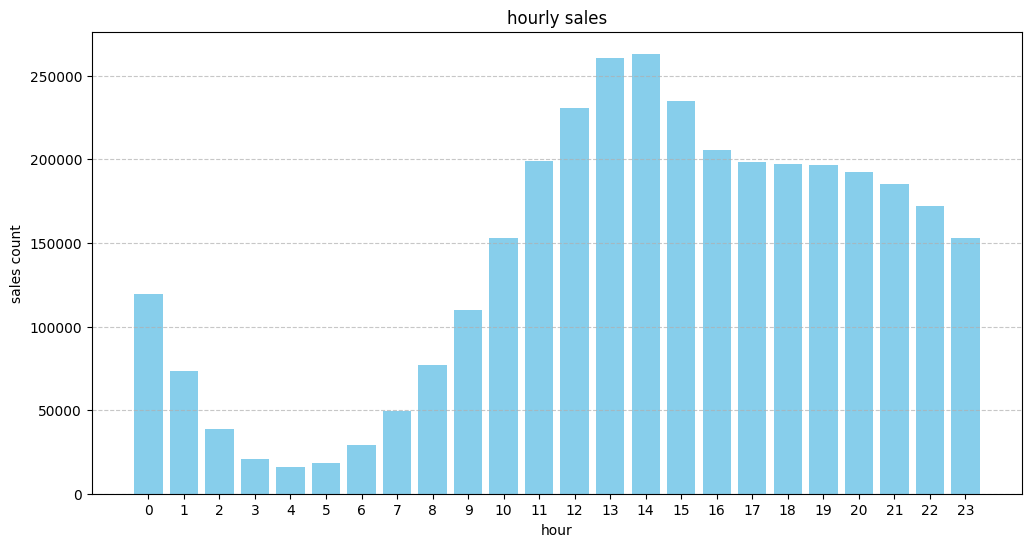

peak hours:
    hour  sales_count
14    14       263204
13    13       260464
15    15       234923
12    12       230797
16    16       205316


In [8]:
# فرض کنید df2 دیتافریم اصلی است که شامل داده‌های فروش است
# تبدیل ستون createdAt به فرمت datetime
df2['createdAt'] = pd.to_datetime(df2['createdAt'])

# استخراج ساعت از ستون createdAt
df2['hour'] = df2['createdAt'].dt.hour

# گروه‌بندی داده‌ها بر اساس ساعت و محاسبه تعداد خریدها
hourly_sales = df2.groupby('hour').size().reset_index(name='sales_count')

# رسم نمودار برای نمایش تعداد خریدها در هر ساعت
plt.figure(figsize=(12, 6))
plt.bar(hourly_sales['hour'], hourly_sales['sales_count'], color='skyblue')
plt.title('hourly sales')
plt.xlabel('hour')
plt.ylabel('sales count')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# نمایش ساعت‌هایی که بیشترین خریدها در آن‌ها رخ داده است
peak_hours = hourly_sales.sort_values(by='sales_count', ascending=False).head(5)
print("peak hours:")
print(peak_hours)

In [9]:

# فرض کنید df2 دیتافریم اصلی است که شامل داده‌های فروش است
# تبدیل ستون createdAt به فرمت datetime
df2['createdAt'] = pd.to_datetime(df2['createdAt'])

# استخراج ساعت از ستون createdAt
df2['hour'] = df2['createdAt'].dt.hour

# گروه‌بندی داده‌ها بر اساس ساعت و محاسبه تعداد خریدها
hourly_sales = df2.groupby('hour').size().reset_index(name='sales_count')

# رسم نمودار تعاملی با Plotly
fig = px.bar(hourly_sales, 
             x='hour', 
             y='sales_count', 
             title='hourly sales',
             labels={'hour': 'hour', 'sales_count': 'sales count'},
             text='sales_count')

# تنظیمات نمودار
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickvals=list(range(0, 24)))
fig.update_yaxes(title='sales count')
fig.show()

In [22]:
# تعریف کلمات کلیدی مرتبط با مشکلات ارسال
keywords = ['تاخیر', 'دیر ' 'طول کشید', 'طول کشیده', 'طولانی', 'بسته‌بندی خراب', 'مشکل در ارسال', 'خراب در حین ارسال', 'هزینه ارسال', 'قیمت ارسال']

# فیلتر کردن نظراتی که شامل کلمات کلیدی هستند
def contains_keywords(text):
    if isinstance(text, str):  # بررسی اینکه آیا متن یک رشته است
        return any(keyword in text for keyword in keywords)
    return False

# تبدیل مقادیر NaN به رشته‌های خالی
df2['description'] = df2['description'].fillna('')

negative_shipping_reviews = df2[df2['description'].apply(contains_keywords)]

# گروه‌بندی نظرات منفی بر اساس شناسه کالا و محاسبه تعداد نظرات منفی
negative_shipping_count = negative_shipping_reviews.groupby('productId').size().reset_index(name='negative_shipping_count')

# مرتب‌سازی کالاها بر اساس تعداد نظرات منفی درباره ارسال
negative_shipping_count = negative_shipping_count.sort_values(by='negative_shipping_count', ascending=False)

# نمایش کالاهایی که بیشترین نظرات منفی درباره ارسال را دارند
print("کالاهایی که بیشترین نظرات منفی درباره ارسال را دارند:")
print(negative_shipping_count.head(10))

کالاهایی که بیشترین نظرات منفی درباره ارسال را دارند:
      productId  negative_shipping_count
3060    3625098                        5
1526    1415047                        4
1220     973245                        4
2517    2910313                        4
675      514675                        4
4076    4687908                        4
2816    3322186                        4
5468    6193717                        4
1068     826376                        4
924      719076                        4


In [24]:
negative_shipping_reviews['description']

95         ممنون از فروشنده محترم که با بسته بندی مناسب ی...
237        درود علیرغم افزایش 10 در صدی قیمت ارسالی اینبا...
423        دومین بار سفارش میدم قطعا باز هم سفارش خواهم د...
1608       کیفیت عالی ولی در ارسال پست بوشهر خیلی با تاخی...
1650       محصول خیلی خوبه ،اما متاسفانه زمان ارسال از پس...
                                 ...                        
3392430    سلام ممنون بابت ارسال ساعت عالی بود توصیه میکن...
3392607    بسته رو تحویل گرفتم. پلمپ و آکبند بود. از فروش...
3392624    رسید. جنس عالی. با میله ارسال شده بسته بندی عا...
3392787                با تاخیر رسید ولی عالی هست، ممنونم 🙏🌷
3393304    ارسال خیلی طولانی و جنس مثل عکس نبود در کل راض...
Name: description, Length: 9011, dtype: object

In [23]:
product_id = 3625098
product_reviews = negative_shipping_reviews[negative_shipping_reviews['productId'] == product_id]

# نمایش نظرات
print(f"نظرات مربوط به کالای با شناسه {product_id}:")
print(product_reviews['description'].tolist())

نظرات مربوط به کالای با شناسه 3625098:
['هزینه ارسال شدیداً بالا! با پست بفرسید!نه تیپاکس', 'چرت بود هزینه ارسال از هزینه خود کالا بیشتر بود .غرفه دار میتونست با پست یا تیباکس بفرسته ولی با باربری فرستاد و به جاهی 50 تومن مجبور شدم 220 تومن پول باربری بدم راضی نیستم', 'چوب لباسی جنس خوبی داشت ولی من هزینه ارسال رو روی محصول پرداخت کردم ولی چون با تیپاکس ارسال کردن مجدد هزینه ارسال پرداخت کردم', 'اصلا راضی نبودم، شماره من رو اشتباه وارد کردن مجبور شدم 60 تومن اضافه بدم باز ارسال بشه از طرف تیپاکس اونم با ۳ روز تاخیر، و وقتی مطرح کردم بجای عذرخواهی و جبران ضرر گفتن پیش میاد دیگه! برای من خیلی گرون تر از چیزی افتاد که باید، بنظرم یا حضوری بخرین یا از فروشنده دیگه.', 'ازم دو بار هزینه ارسال گرفتن']
